In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from itertools import combinations
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
iris = datasets.load_iris()
X = iris.data[:, :2]  
y = iris.target

In [5]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [6]:
y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy:.2f}")

Точность: 0.80


In [7]:
X_test_lda = lda.transform(X_test)

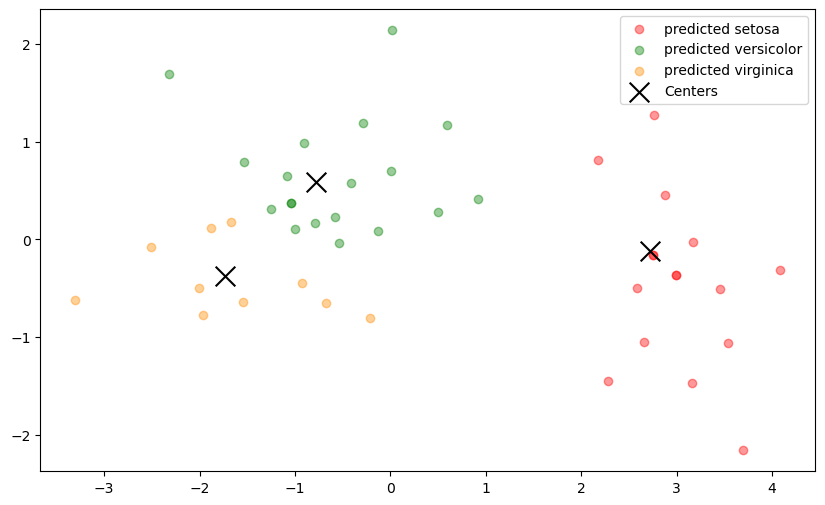

In [8]:
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_test_lda[y_pred == i, 0], X_test_lda[y_pred == i, 1], alpha=.4, color=color,
                label=f'predicted {target_name}', marker='o')

centers = lda.transform(lda.means_)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, color='black', label='Centers')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
distortions = []
K = range(1,6)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init = 'auto')
    kmeanModel.fit(X_scaled)
    distortions.append(kmeanModel.inertia_)

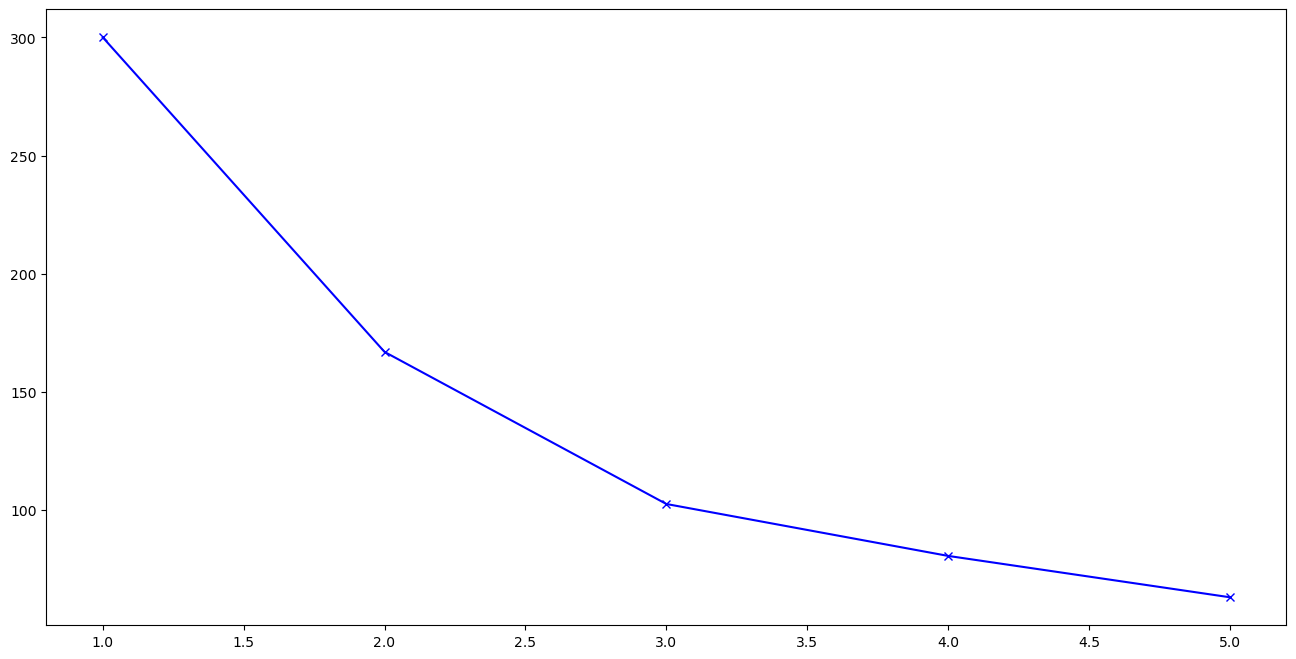

In [11]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.show()

In [12]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(X_scaled)

KMeans(n_clusters=3)

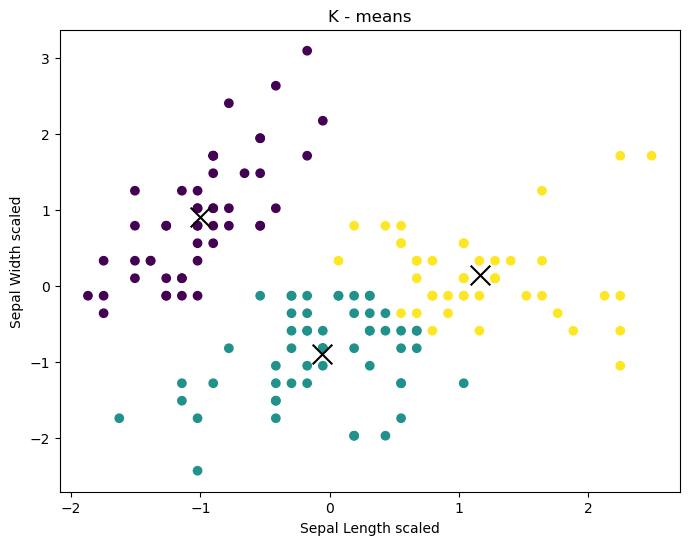

In [13]:
labels = kmeanModel.labels_
cluster_centers = kmeanModel.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x', s=200)
plt.title('K - means')
plt.xlabel('Sepal Length scaled')
plt.ylabel('Sepal Width scaled')
plt.show()